In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
state_price = pd.read_csv('/Users/timwillard/Desktop/group3-project2-ml/Data/Zillow/Sale_Prices_State.csv', index_col=0)
state_price.head()

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,9,California,1,392500.0,373800.0,351800.0,334700.0,320100.0,306600.0,293300.0,...,493000,491900,491600,493800,498400,505600,513500,518700,524400,NaN
1,54,Texas,2,139900.0,139300.0,137600.0,137400.0,137700.0,139500.0,139600.0,...,226100,226700,228100,229400,232700,234700,236800,237200,239900,NaN
2,43,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,297000,298100,301700,295100,296000,297100,305400,308800,324800,342500.0
3,14,Florida,4,203400.0,195500.0,189300.0,184800.0,181700.0,178100.0,172700.0,...,224600,226100,227000,228900,230800,234400,238100,243300,247600,NaN
4,21,Illinois,5,204400.0,198400.0,185000.0,177500.0,174300.0,176300.0,176900.0,...,195900,192000,189500,188100,190000,191300,194600,195100,200200,210300.0


In [8]:
state_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 48
Columns: 148 entries, RegionID to 2020-03
dtypes: float64(112), int64(35), object(1)
memory usage: 57.0+ KB


In [9]:
state_price.describe()

,RegionID,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
count,49.000000,49.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,9.000000
mean,33.244898,25.00000,192051.162791,189118.604651,185060.465116,181830.232558,180795.348837,180123.255814,178420.930233,176453.488372,...,241734.693878,242485.714286,242895.918367,244240.816327,245991.836735,248648.979592,251889.795918,254275.510204,258477.551020,304044.444444
std,16.688982,14.28869,82846.126363,80208.998592,77571.561859,75227.751132,75353.825553,74885.038359,73804.192545,72760.184523,...,97918.411086,97933.961593,97375.283395,98416.965675,99246.670466,101013.301769,103135.651460,103876.432061,104874.214867,124595.787560
min,4.000000,1.00000,97000.000000,94800.000000,90200.000000,85800.000000,85400.000000,85100.000000,84500.000000,81500.000000,...,140300.000000,141300.000000,140600.000000,140600.000000,140900.000000,142300.000000,142200.000000,145300.000000,145400.000000,188400.000000
25%,20.000000,13.00000,125950.000000,124750.000000,124050.000000,122400.000000,121900.000000,121850.000000,122050.000000,121400.000000,...,174900.000000,177300.000000,176400.000000,175700.000000,175600.000000,178000.000000,179600.000000,182400.000000,182900.000000,210300.000000
50%,34.000000,25.00000,179600.000000,177100.000000,172900.000000,171300.000000,168300.000000,166900.000000,166200.000000,167100.000000,...,224600.000000,225600.000000,226600.000000,228900.000000,228900.000000,230600.000000,228100.000000,233500.000000,238500.000000,284300.000000
75%,46.000000,37.00000,237700.000000,234950.000000,231500.000000,225100.000000,220300.000000,213600.000000,207950.000000,209450.000000,...,273500.000000,273900.000000,271900.000000,272600.000000,274700.000000,276000.000000,280000.000000,280500.000000,285100.000000,342500.000000
max,62.000000,49.00000,408200.000000,392800.000000,385400.000000,382500.000000,402100.000000,411700.000000,402100.000000,404200.000000,...,566700.000000,575300.000000,569400.000000,571400.000000,573900.000000,577900.000000,591100.000000,593500.000000,608900.000000,586100.000000


In [10]:
missing_values_count = state_price.isnull().sum()
missing_values_count = missing_values_count[missing_values_count >0]
print(missing_values_count)

2008-03     6
2008-04     6
2008-05     6
2008-06     6
2008-07     6
           ..
2017-02     3
2017-03     3
2017-04     3
2017-05     3
2020-03    40
Length: 112, dtype: int64


In [11]:
state_price = state_price.drop(columns=['RegionID'])
print(state_price.head())

   RegionName  SizeRank   2008-03   2008-04   2008-05   2008-06   2008-07  \
0  California         1  392500.0  373800.0  351800.0  334700.0  320100.0   
1       Texas         2  139900.0  139300.0  137600.0  137400.0  137700.0   
2    New York         3       NaN       NaN       NaN       NaN       NaN   
3     Florida         4  203400.0  195500.0  189300.0  184800.0  181700.0   
4    Illinois         5  204400.0  198400.0  185000.0  177500.0  174300.0   

    2008-08   2008-09   2008-10  ...  2019-06  2019-07  2019-08  2019-09  \
0  306600.0  293300.0  279600.0  ...   493000   491900   491600   493800   
1  139500.0  139600.0  139200.0  ...   226100   226700   228100   229400   
2       NaN       NaN       NaN  ...   297000   298100   301700   295100   
3  178100.0  172700.0  167100.0  ...   224600   226100   227000   228900   
4  176300.0  176900.0  177400.0  ...   195900   192000   189500   188100   

   2019-10  2019-11  2019-12  2020-01  2020-02   2020-03  
0   498400   505600  

In [12]:
columns_to_drop = [col for col in state_price.columns if col.startswith('20') and int(col.split('-')[0]) < 2018]
state_price = state_price.drop(columns=columns_to_drop)
print(state_price.head())

   RegionName  SizeRank  2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  \
0  California         1   469200   472300   476400   479200   480800   482300   
1       Texas         2   210200   212500   214100   215300   215300   215500   
2    New York         3   266300   268500   273300   280500   282000   283200   
3     Florida         4   206500   211800   215800   217700   215900   215100   
4    Illinois         5   175900   178800   183400   184600   183400   184900   

   2018-07  2018-08  ...  2019-06  2019-07  2019-08  2019-09  2019-10  \
0   483600   483200  ...   493000   491900   491600   493800   498400   
1   215300   214400  ...   226100   226700   228100   229400   232700   
2   282800   282600  ...   297000   298100   301700   295100   296000   
3   214900   216500  ...   224600   226100   227000   228900   230800   
4   185400   185200  ...   195900   192000   189500   188100   190000   

   2019-11  2019-12  2020-01  2020-02   2020-03  
0   505600   513500   51

In [ ]:
columns_2020 = [col for col in state_price.columns if col.startswith('2020')] 
state_price[columns_2020] = state_price[columns_2020].interpolate(method='linear', axis=0)
print(state_price[columns_2020].head())

   2020-01  2020-02   2020-03
0   518700   524400       NaN
1   237200   239900       NaN
2   308800   324800  342500.0
3   243300   247600  276400.0
4   195100   200200  210300.0


In [13]:
numeric_columns = [col for col in state_price if col.startswith('20')]
state_price[numeric_columns] = state_price[numeric_columns].apply(pd.to_numeric, errors='coerce')
print(state_price.dtypes[numeric_columns])

2018-01      int64
2018-02      int64
2018-03      int64
2018-04      int64
2018-05      int64
2018-06      int64
2018-07      int64
2018-08      int64
2018-09      int64
2018-10      int64
2018-11      int64
2018-12      int64
2019-01      int64
2019-02      int64
2019-03      int64
2019-04      int64
2019-05      int64
2019-06      int64
2019-07      int64
2019-08      int64
2019-09      int64
2019-10      int64
2019-11      int64
2019-12      int64
2020-01      int64
2020-02      int64
2020-03    float64
dtype: object


In [14]:
sale_price_columns = [ col for col in state_price.columns if col.startswith('20')]
price_stats = state_price[sale_price_columns].describe()
print(price_stats)

             2018-01        2018-02        2018-03        2018-04  \
count      49.000000      49.000000      49.000000      49.000000   
mean   224234.693878  226493.877551  228365.306122  229620.408163   
std     90971.171146   91527.389817   91644.281852   93397.994669   
min    132100.000000  133400.000000  134000.000000  133100.000000   
25%    159000.000000  160000.000000  162900.000000  163200.000000   
50%    210200.000000  211400.000000  210800.000000  209400.000000   
75%    254500.000000  256800.000000  259700.000000  261400.000000   
max    519700.000000  522500.000000  524100.000000  525200.000000   

             2018-05        2018-06        2018-07        2018-08  \
count      49.000000      49.000000      49.000000      49.000000   
mean   229514.285714  229548.979592  229508.163265  229465.306122   
std     94400.759178   94678.392296   94994.352544   94755.117608   
min    133100.000000  130700.000000  130300.000000  129400.000000   
25%    164800.000000  166500.0000

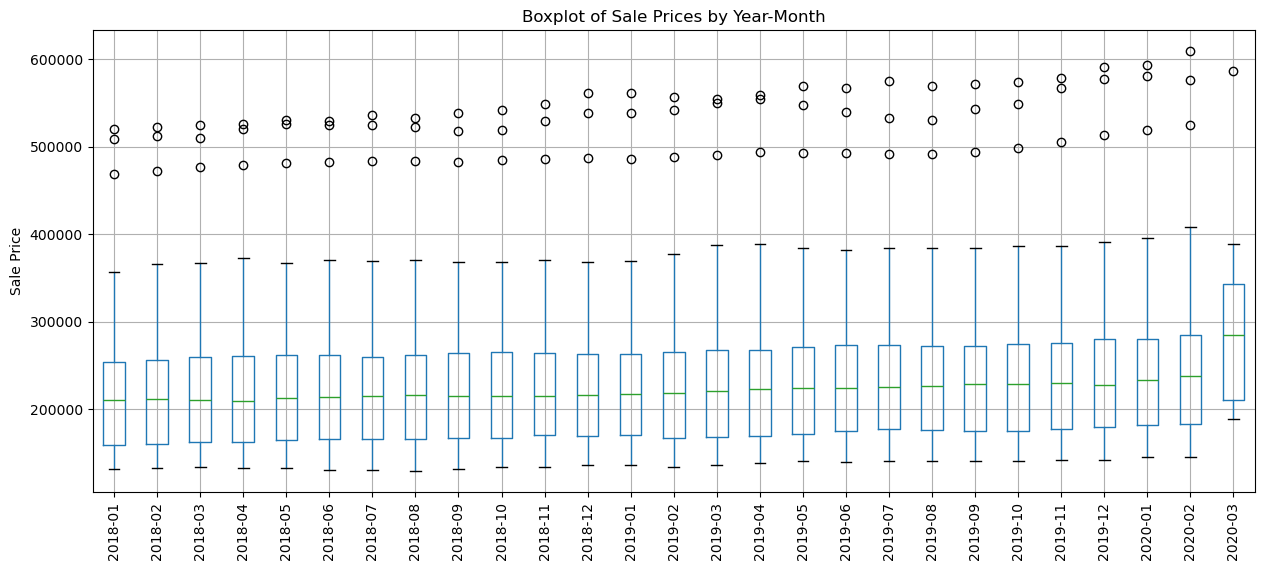

In [15]:
plt.figure(figsize=(15, 6))
state_price[sale_price_columns].boxplot(rot=90)
plt.title('Boxplot of Sale Prices by Year-Month')
plt.ylabel('Sale Price')
plt.show()

In [16]:
scaler = StandardScaler()

In [17]:
state_price[numeric_columns] = scaler.fit_transform(state_price[numeric_columns])
print(state_price[numeric_columns].head())

    2018-01   2018-02   2018-03   2018-04   2018-05   2018-06   2018-07  \
0  2.720685  2.713433  2.734541  2.699908  2.689489  2.697239  2.702529   
1 -0.155875 -0.154477 -0.157273 -0.154916 -0.152134 -0.149924 -0.151118   
2  0.467194  0.463702  0.495398  0.550406  0.561750  0.572538  0.566814   
3 -0.196969 -0.162204 -0.138530 -0.128953 -0.145712 -0.154193 -0.155373   
4 -0.536825 -0.526489 -0.495735 -0.487023 -0.493557 -0.476473 -0.469136   

    2018-08   2018-09   2018-10  ...   2019-06   2019-07   2019-08   2019-09  \
0  2.705544  2.698689  2.700886  ...  2.592660  2.573152  2.580546  2.562011   
1 -0.160640 -0.161778 -0.165528  ... -0.161325 -0.162858 -0.153522 -0.152358   
2  0.566569  0.559743  0.545224  ...  0.570250  0.573760  0.610149  0.522128   
3 -0.138248 -0.134027 -0.122968  ... -0.176803 -0.169048 -0.164936 -0.157491   
4 -0.471996 -0.510798 -0.528352  ... -0.472941 -0.520850 -0.554034 -0.576350   

    2019-10   2019-11   2019-12   2020-01   2020-02   2020-03  
0  2

In [18]:
price_columns = [col for col in state_price.columns if col.startswith('20')]
state_price_model = state_price.melt(id_vars=['RegionName'], value_vars=price_columns,
                                     var_name='Date', value_name="Price")
state_price_model['Date'] = pd.to_datetime(state_price_model['Date'])

In [19]:
state_price_model['Date_Ordinal'] = state_price_model['Date'].map(pd.Timestamp.toordinal)

In [20]:
state_price_model = state_price_model.dropna()

In [21]:
X = state_price_model[['Date_Ordinal']]
y = state_price_model['Price']

In [22]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [23]:
future_dates = pd.date_range(state_price_model['Date'].max(), periods=12, freq='M')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1,1)
future_price_predictions = model.predict(future_dates_ordinal)


/var/folders/0v/k5cxfnrj4_x27cyj9ynqp8qh0000gn/T/ipykernel_53764/890625822.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(state_price_model['Date'].max(), periods=12, freq='M')
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


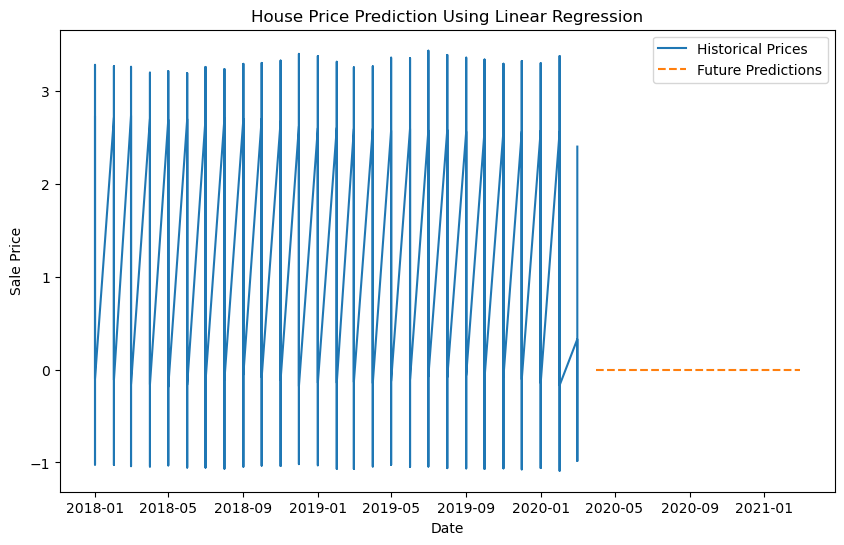

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(state_price_model["Date"], y, label="Historical Prices")
plt.plot(future_dates, future_price_predictions , label="Future Predictions", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Sale Price")
plt.title("House Price Prediction Using Linear Regression")
plt.legend()
plt.show()